# Assignment - APRAU Group 1

**Student - Student number**  
Ladislav Gardian - 1240524  
Lars van der Griend - 1240271  
Peter Likavec - 1240523  

In [147]:
# Importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

For every group, three datasets where available for creating a model to predict the Vegetaton Type. This classification problem will be solved by applying Machine Learning models. To train and test such Machine Learning models, all three datasets are loaded and merged into one big dataset which will be used in the rest of the Notebook. It is already important to mention that the merged dataset is imbalanced. The number of classes of Vegetation Type 1, 2 and 3 is not equal.

In [148]:
# Load data from the three available datasets for Group 1
df_1 = pd.read_csv("Data_Class_1.csv")
df_2 = pd.read_csv("Data_Class_2.csv")
df_3 = pd.read_csv("Data_Class_3.csv")

In [149]:
# Merging the DataFrames 
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

type_counts = df['Vegetation_Type'].value_counts().reset_index()
type_counts.columns = ['Vegetation_Type', 'Count']

type_counts


,Vegetation_Type,Count
0,Type_1,2160
1,Type_3,1620
2,Type_2,1404


In [150]:
df.head()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level,Soil_Type,Wilderness_Area,Vegetation_Type
0,41,2699,347,3,0,0,2096,213,234,159,6853,37.32,282.46,125.22,6.23,Type_20,Area_1,Type_1
1,52,2739,323,25,85,43,3118,149,205,192,6219,76.51,182.57,532.19,30.65,Type_29,Area_1,Type_1
2,53,2696,72,2,30,0,3271,222,234,149,6071,86.37,374.79,275.52,59.96,Type_30,Area_1,Type_1
3,56,2722,315,24,30,19,3216,148,212,200,6132,85.31,364.30,1182.48,22.21,Type_16,Area_1,Type_1
4,68,2919,13,13,90,6,5321,207,214,142,4060,78.13,303.26,1198.69,14.22,Type_29,Area_1,Type_1


## Exploratory Analysis

To get a better understanding of the data, an exploratory analysis of the dataset will be done. This exploratory analysis can give prior insights on the data, can help understand the data structure and dimensions better, and much more. The subsections below will guide through this exploratory analysis in steps.  

### Descriptive Statistics and Data Types 
Using built-in Python functions, the descriptive statistics of all numerical columns in the dataset can be summarized, see the Table below. The *count* for every column equals 5184, indicating that there are no missing values. Furthermore, the data type per column is shown. Excluding the target variable *Vegetation_Type*, there are two more categorical columns; *Soil_Type* and *Wilderness_Area*. The other columns all contain numerical values. Moreover, the number of unique values per column is shown.

In [151]:
df.describe()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.000000
mean,7510.204861,2843.550926,161.878665,15.517554,256.798997,49.864198,2035.544367,209.343943,221.727238,142.834298,1708.383488,60.076663,299.36472,645.818277,34.885449
std,4624.413034,357.981922,111.928353,8.307825,199.066593,57.863126,1515.358119,31.160176,21.742296,41.390832,1248.504473,17.307780,87.00860,323.909683,17.445434
min,3.000000,1903.000000,0.000000,1.000000,0.000000,-146.000000,0.000000,58.000000,115.000000,0.000000,30.000000,30.000000,150.07000,90.070000,5.000000
25%,2978.500000,2561.750000,63.000000,9.000000,108.000000,9.000000,870.000000,194.750000,211.000000,117.000000,806.750000,45.125000,223.50750,357.600000,19.600000
50%,8273.500000,2935.000000,137.000000,14.000000,216.000000,34.000000,1572.500000,217.000000,225.000000,143.000000,1395.500000,60.160000,300.21500,645.960000,34.880000
75%,11262.250000,3136.250000,271.000000,21.000000,361.000000,75.000000,2916.250000,232.000000,237.000000,171.000000,2292.000000,75.115000,374.62250,933.370000,50.275000
max,15118.000000,3675.000000,360.000000,47.000000,1343.000000,547.000000,6836.000000,254.000000,254.000000,248.000000,6993.000000,89.980000,449.98000,1199.880000,64.990000


In [152]:
# Check data types and missing values
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

data_info

,Data Type,Missing Values,Unique Values
Id,int64,0,5184
Altitude,int64,0,1359
Slope_Orientation,int64,0,361
Slope,int64,0,46
Horizontal_Distance_To_Water,int64,0,290
Vertical_Distance_To_Water,int64,0,338
Horizontal_Distance_To_Roadways,int64,0,2346
Shadow_Index_9h,int64,0,170
Shadow_Index_12h,int64,0,127
Shadow_Index_15h,int64,0,232


### Univariate Analysis

Now the distribution of the data in individual columns (i.e., features) can be investigated. Understanding the distributions of the features is relevant for later data analysis. Based on the distribution of the features, different methods should be applied. First, the distribution of the numerical features will be checked by creating histograms. The density curves are added to help understand the distributions. As can be seen, the features all have different distributions. Some Uniform, Gamma, Normal and other distributions can be recognized.

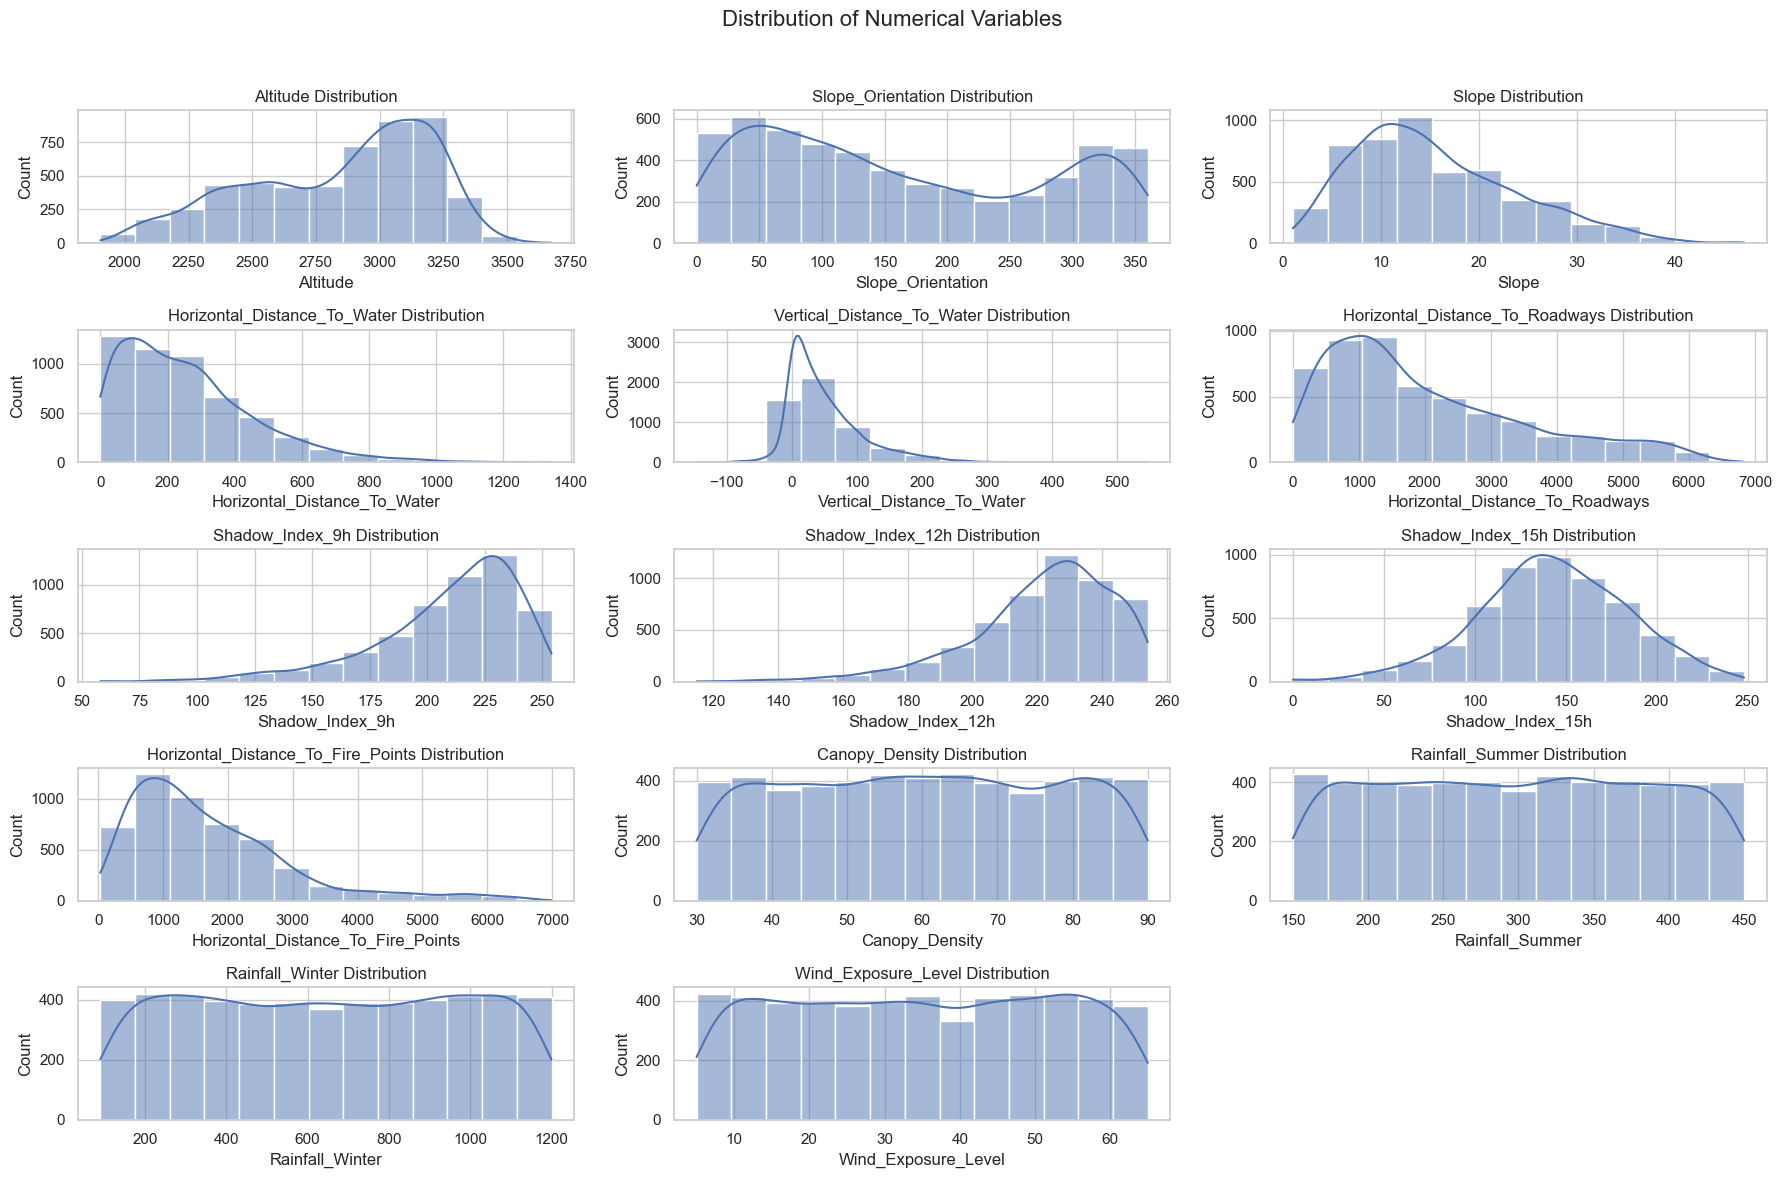

In [153]:
# Set the style for the visualizations
sns.set(style="whitegrid")

# List of numerical columns to plot
numerical_columns = [
    'Altitude', 'Slope_Orientation', 'Slope', 
    'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water', 
    'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 
    'Shadow_Index_12h', 'Shadow_Index_15h', 
    'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
    'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level'
]

# Set up the subplots, adjusting number of rows and columns to fit all features
num_plots = len(numerical_columns)
cols = 3
rows = num_plots // cols + (num_plots % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_columns):
    row = i // cols
    col_idx = i % cols
    sns.histplot(df[col], kde=True, bins=int(np.round(np.log2(len(df)) + 1)), ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} Distribution')

# Hide any unused subplots
for i in range(num_plots, rows * cols):
    fig.delaxes(axes.flat[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Now, using barcharts the distribution of the non-numerical features (excluding the target variable) can be visualized. It can be seen that for the *Soil_Type* some values occur very often, and some occur only a few times. The *Wilderness_Area* distribution is a bit skewed as well.

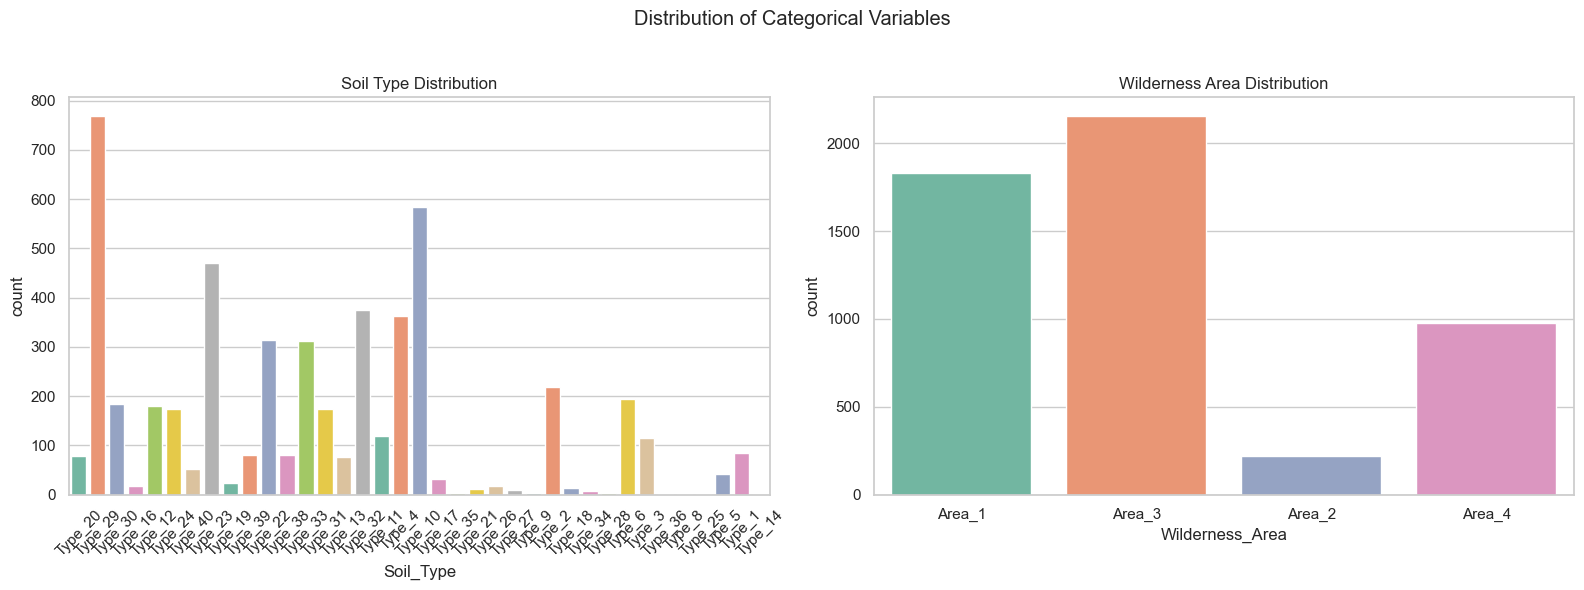

In [154]:
# Plot bar plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Categorical Variables')

sns.countplot(x='Soil_Type', data=df, ax=axes[0], palette='Set2')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Soil Type Distribution')

sns.countplot(x='Wilderness_Area', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Wilderness Area Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Bivariate Analysis 
Now we can investigate the relationship between the individual features and the Vegetation Type. Since the problem of predicting the *Vegetation_Type* is a classification problem, to identify patterns between the numerical variables and target variable, violinplots are used. Violinplots give the distribution of the numerical value, given the target variable *Vegetation_Type*.

In [ ]:
# Set up the subplots, adjusting number of rows and columns to fit all features
num_plots = len(numerical_columns)
cols = 3  # Number of columns in the grid
rows = num_plots // cols + (num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
fig.suptitle('Scatter Plots: Vegetation_Type vs Numerical Variables', fontsize=16)

# Plot violoinplots for each numerical feature against the target variable 'Vegetation_Type'
for i, col in enumerate(numerical_columns):
    row = i // cols
    col_idx = i % cols
    sns.violinplot(x=df['Vegetation_Type'], y=df[col], ax=axes[row, col_idx], palette='Set2')  # Vegetation_Type on x-axis
    axes[row, col_idx].set_title(f'Vegetation_Type vs {col}')
    axes[row, col_idx].set_xlabel('Vegetation_Type')  
    axes[row, col_idx].set_ylabel(col)  

# Hide any unused subplots (in case the grid has extra slots)
if num_plots % cols != 0:  # Only if there are unused subplots
    for j in range(num_plots, rows * cols):
        fig.delaxes(axes.flat[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

From these violinplots, some general observations can be made.

**Altitude**: The vegetation types appear to be well-separated by altitude. Type_1 is at a higher altitude, while Type_3 is at a lower altitude, with Type_2 in between. This suggests altitude may be a good feature for distinguishing between the types.

**Slope_Orientation**: All three types show overlap in terms of slope orientation, so it doesn't seem to differentiate vegetation types strongly.

**Slope**: There is no significant distinction between the vegetation types based on slope alone, as all seem to occupy similar ranges.

**Horizontal and Vertical Distance to Water**: These variables show some degree of separation, especially for Type_3, which tends to have smaller horizontal distances to water. Type_1 and Type_2 overlap more but still show some separation.

**Shadow Index (9h, 12h, 15h)**: There’s a fair amount of overlap in the shadow indices among the vegetation types, meaning these variables may not be significant in distinguishing between them.

**Horizontal Distance to Roadways**: This feature appears to be quite distinct for Type_3, which has a smaller range and distances from roadways compared to Type_2 and Type_3.

**Horizontal Distance to Fire Points**: This variable has some separation between vegetation types, with Type_3 having much lower distances to fire points than Type_1 and Type_2, which have a wider distribution.

**Canopy Density**: All vegetation types appear to have similar canopy densities, making it difficult to differentiate between them based on this feature.

**Rainfall (Summer and Winter)**: The rainfall in both seasons seems to be very similar across vegetation types, showing little to no variation or overlap.

**Wind Exposure Level**: There is minimal distinction among the vegetation types based on wind exposure, as all three distributions seem similar.

**Key Insights**:
Altitude and Horizontal Distance to Roadways/Fire Points appear to be strong variables for separating vegetation types. Some features, like Slope Orientation, Shadow Indices, and Canopy Density, show a lot of overlap, suggesting they might not be as important in classification.
Horizontal Distance to Water also provides some separability for Type_3, which might help in classification.  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns='Id').columns

# Create subplots for each numerical column vs the label (Vegetation_Type)
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(16, len(numerical_columns)*2))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each numerical column and create boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x='Vegetation_Type', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs Vegetation_Type')
    axes[i].set_xlabel('Vegetation Type')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

To gain more insights in the correlation between the numerical features, a heatmap is created.

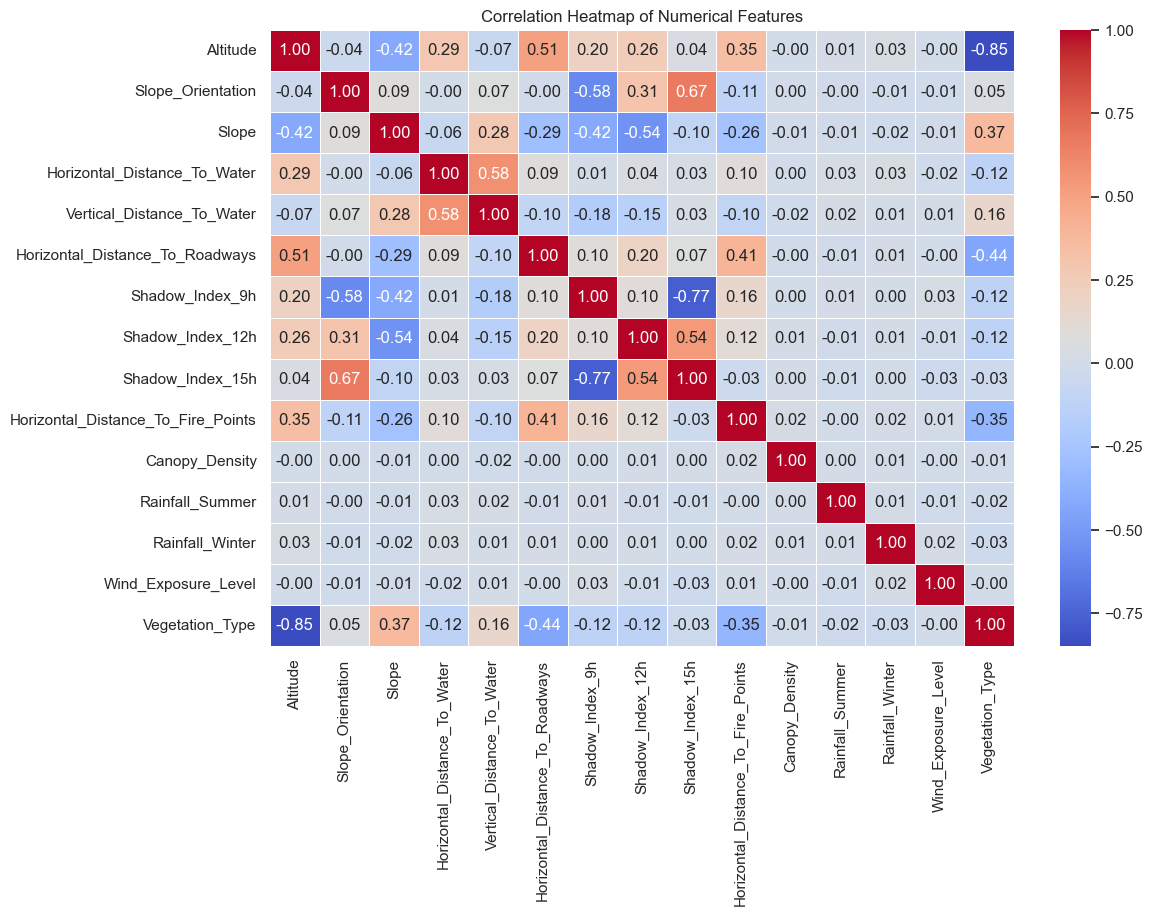

In [128]:
# Use factorize to define the categorical target variable into classes
df['Vegetation_Type'] = df.Vegetation_Type.factorize()[0]

# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Altitude', 'Slope_Orientation', 'Slope', 
    'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water', 
    'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 
    'Shadow_Index_12h', 'Shadow_Index_15h', 
    'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
    'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level',
    'Vegetation_Type'  
]

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Some observations can be made from this Correlation Heatmap.

**Altitude**: Strong negative correlation with Vegetation_Type (-0.85), showing altitude plays a major role in distinguishing vegetation types.

**Horizontal_Distance_To_Roadway**s: Moderate negative correlation (-0.44), indicating distance from roadways helps differentiate vegetation types.

**Slope**: Positive correlation (0.37), suggesting steeper slopes are more common in certain vegetation types.

**Horizontal_Distance_To_Fire_Points**: Moderate negative correlation (-0.35), showing vegetation type is influenced by distance from fire points.

**Shadow Indices**: Little correlation with Vegetation_Type, implying minimal impact on vegetation classification.  

Some Bivariate analysis can be done on the categorical variables as well. Using stacked barcharts the distribution of the categorical variables per vegetation type can be visualized. In the graphs, the values of Vegetation_Type 0, 1 and 2 correspond to respectively Type_1, Type_2 and Type_3. As can be seen, the distribution of the *Vegetation_Type* differs highly per category of the *Soil_Type* and *Wilderness_Area*. For example, Wilderness Area 4 almost always has Vegetation Type 3. This indicates that both *Soil_Type* and *Wilderness_Area* can be relevant features in the classification problem.

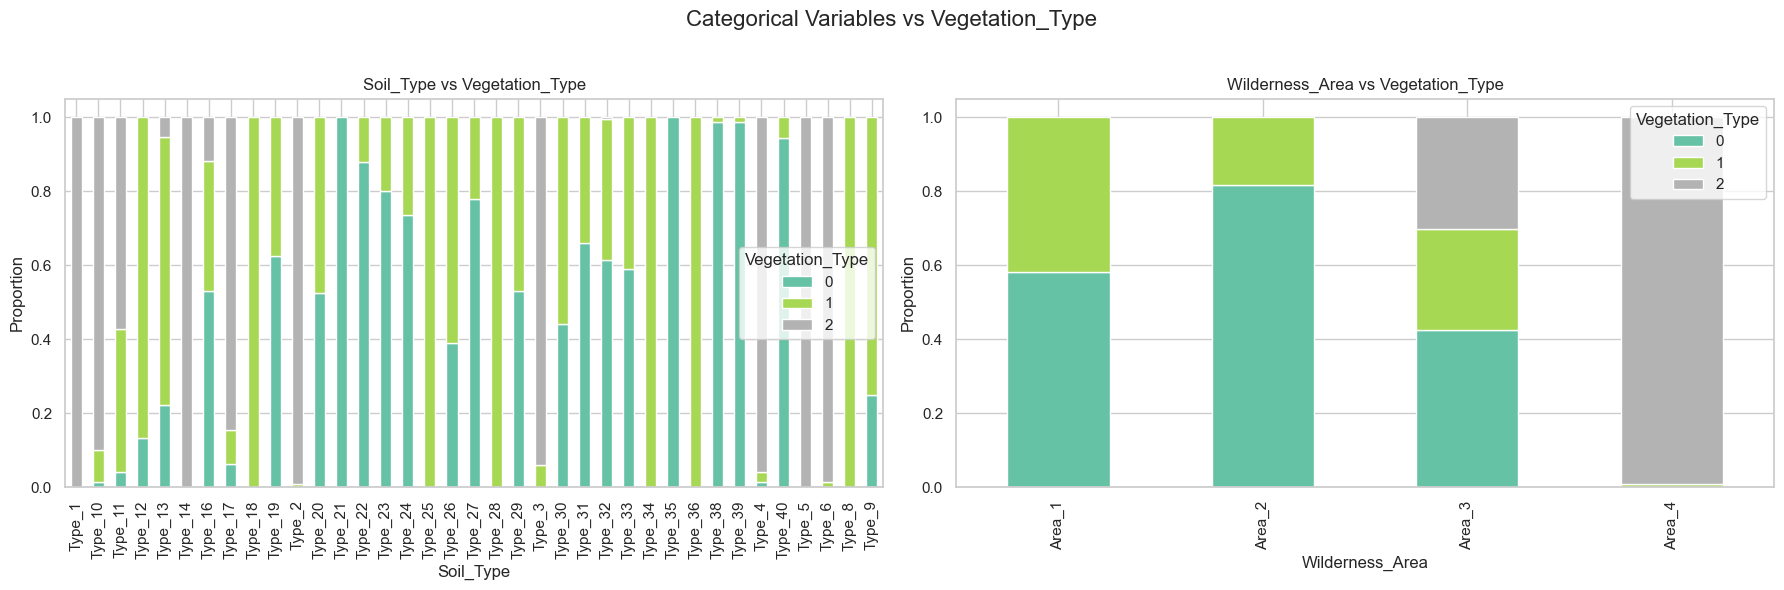

In [129]:
# List the categorical column names
categorical_columns = [
    'Soil_Type', 'Wilderness_Area']

# Set up subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(18, 6))
fig.suptitle('Categorical Variables vs Vegetation_Type', fontsize=16)

# Plot stacked bar charts for each categorical feature
for i, col in enumerate(categorical_columns):
    # Create a cross-tabulation of 'Vegetation_Type' against the categorical variable
    crosstab = pd.crosstab(df[col], df['Vegetation_Type'], normalize='index')
    
    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f'{col} vs Vegetation_Type')
    axes[i].set_ylabel('Proportion')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Summarized**:  
From this Univariate and Bivariate analysis some information can be extracted before applying any Machine Learning model. The features that are very relevant in the classification problem of the vegetation types are the altitude, slope, distances to roadways/fire points, soil type and wilderness area. On the other hand, the shadow indices seem to be of little importance in applying Machine Learning models.

### Chi-Squared Test
To show that the categorical variables in the dataset (i.e., *Soil_Type* and *Wilderness_Area*)  are significant, and we should include them into the model and transform them into dummies, a Chi-Squared test is used. The null-hypothesis of this test states that the categorical variables are not significant. After doing the Chi-Squared test, the p-value will determine whether to reject the null-hypothesis or not. As can be seen in the following code output, for both categorical variables the p-value is < 0.05 indicating that the null-hypothesis should be rejected and both categorical variables are significant.

In [130]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test for each categorical feature against the target Vegetation_Type
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Vegetation_Type'])  # Contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Chi-Square test
    
    print(f'Chi-Square Test for {col}:')
    print(f'Chi-Square statistic = {chi2}')
    print(f'P-Value = {p}')
    print(f'Degrees of Freedom = {dof}')
    print('-' * 50)
    

Chi-Square Test for Soil_Type:
Chi-Square statistic = 5569.050003992086
P-Value = 0.0
Degrees of Freedom = 72
--------------------------------------------------
Chi-Square Test for Wilderness_Area:
Chi-Square statistic = 3097.3323988488182
P-Value = 0.0
Degrees of Freedom = 6
--------------------------------------------------


## Machine Learning Methods 

### Data Preprocessing
Before Machine Learning models can be applied to the data, the data first needs some preprocessing. First of all, as most Machine Learning models can only handle numerical data, the categorical variables should be transformed into numerical variables. Several methods exist for this, but since our categorical data has no order, the most suitable method is OneHotEncoding. OneHotEncoding creates a new binary column for every class in the categorical columns. OneHotEncoding can be done fast using the built-in pandas function *get_dummies()*.  

In [131]:
df = pd.get_dummies(df, columns=['Soil_Type', 'Wilderness_Area'])
df.head()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,...,Soil_Type_Type_4,Soil_Type_Type_40,Soil_Type_Type_5,Soil_Type_Type_6,Soil_Type_Type_8,Soil_Type_Type_9,Wilderness_Area_Area_1,Wilderness_Area_Area_2,Wilderness_Area_Area_3,Wilderness_Area_Area_4
0,41,2699,347,3,0,0,2096,213,234,159,...,False,False,False,False,False,False,True,False,False,False
1,52,2739,323,25,85,43,3118,149,205,192,...,False,False,False,False,False,False,True,False,False,False
2,53,2696,72,2,30,0,3271,222,234,149,...,False,False,False,False,False,False,True,False,False,False
3,56,2722,315,24,30,19,3216,148,212,200,...,False,False,False,False,False,False,True,False,False,False
4,68,2919,13,13,90,6,5321,207,214,142,...,False,False,False,False,False,False,True,False,False,False


Moreover, another data preprocessing step is scaling. Scaling must happen to make sure that no features become more dominant only because they are larger in magnitude. Several methods exist for data scaling such as MinMax Scaling and Standardization. Since the features have different distributions, Standardization is used for scaling using the StandardScaler().

In [132]:
# Split into features (X) and target (y)
X = df.drop(['Id', 'Vegetation_Type'], axis=1)  # independent variables, drop Id and the target variable
y = df['Vegetation_Type']  # target variable

# Import the standard scaler
from sklearn.preprocessing import StandardScaler

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale the input data

### Resampling Techniques
In this section, we apply various resampling methods to assess their effectiveness on our dataset. The primary goal is to identify the most suitable technique for our specific data characteristics. The resampling methods that will be tasted are holdout sampling, K-Fold cross-validation, Leave-One-Out-Cross-Validation (LOOCV) and bootstrap sampling.

To facilitate a comprehensive analysis, we initially utilize all resampling methods without feature elimination (i.e., the full dataset is used). This approach allows us to observe the impact of each resampling technique on the model's performance metrics, enabling us to make informed decisions regarding feature selection in subsequent analyses.

In [133]:
# Import the Machine Learning methods, resampling methods and evaluation metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, mean_squared_error, r2_score
from sklearn.calibration import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Write a function to efficiently plot the ROC curve for a trained model
def plot_roc_curve(model, X_train, X_test, y_train, y_test, n_classes):
    # Binarize the output
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    
    # Use OneVsRestClassifier for multi-class ROC
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plotting the ROC curves
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    
    for i, color in enumerate(colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve (area = {0:0.2f}) for class {1}'.format(roc_auc[i], i))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

# Write a function to efficiently plot the confusion matrix for a trained model
def evaluate_confusion_matrix(y_test, y_pred, model_classes=['VT1', 'VT2', 'VT3']):
    cm = confusion_matrix(y_test, y_pred)
    
    # Display the confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Visualize the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Holdout resampling
def holdout(model, X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)       
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)  
    f1 = f1_score(y_test, y_pred, average='weighted')  
    
    print(f"Holdout F1 Score: {f1:.6f}")
    
    
    # Call confusion matrix evaluation
    model_classes = ['VT1', 'VT2', 'VT3']  
    evaluate_confusion_matrix(y_test, y_pred, model_classes)  
    
    # Return the predictions and test labels for confusion matrix evaluation
    return X_train, X_test, y_train, y_test, y_pred, f1

# K-Fold cross-validation
def k_fold_cv(model, X, y, k=5, random_state=42):
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')  
    
    print(f"Cross-Validation F1 Scores: {cv_results}")
    mean_f1 = cv_results.mean()
    print(f"Mean F1 Score: {mean_f1:.6f}")
    
    return mean_f1

# LOOCV (Leave-One-Out Cross-Validation)
def loocv(model, X, y):
    loo = LeaveOneOut()
    cv_results = cross_val_score(model, X, y, cv=loo, scoring='f1_weighted') 
    
    mean_f1 = cv_results.mean()
    print(f"LOOCV Mean F1 Score: {mean_f1:.6f}")
    return mean_f1

# Bootstrap resampling
def bootstrap(model, X, y, n_iterations=10):
    n_samples = X.shape[0]
    f1_scores = []

    for i in range(n_iterations):
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        X_train, y_train = X[indices], y[indices]
        out_of_bag = list(set(range(n_samples)) - set(indices))
        X_test, y_test = X[out_of_bag], y[out_of_bag]
        
        model.fit(X_train, y_train)
        
        if len(out_of_bag) > 0:  # Ensure there are out-of-bag samples
            y_pred = model.predict(X_test)
            f1 = f1_score(y_test, y_pred, average='weighted')  
            f1_scores.append(f1)
    
    mean_f1 = np.mean(f1_scores)
    print(f"Bootstrap Mean F1 Score: {mean_f1:.6f}")
    return f1_scores

### Methods Application with complete dataset  
After coding all resampling methods, these resampling methods can be used on the Machine Learning methods to test their effectiveness in this classification problem. Three types of Machine Learning methods are applied, namely Logistic Regression (LR), Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA). All resampling methods will be tested on these Machine Learning (ML) methods. To evaluate which method is most suitable for this classification problem, evaluation metrics are used. The evaluation metrics that are most suitable to use in a classification problem are accuracy, precision, recall, F1-score, support and a ROC curve. Since our dataset is imbalanced, accuracy is not a good evaluation metric. The evaluation metrics that will be used for comparing the performance of the ML models are the F1-score and a ROC curve. The F1-score is the mean of the precision and recall which are important metric in classification problems. The F1-score is very useful for this classification problem since the dataset is imbalanced. For the best model, the confusion matrix will also be shown. The cell below runs all resampling methods for all three ML models.


Evaluating Logistic Regression...
Holdout F1 Score: 0.847900
Confusion Matrix:
[[353  87   3]
 [ 53 201  13]
 [  0   2 325]]


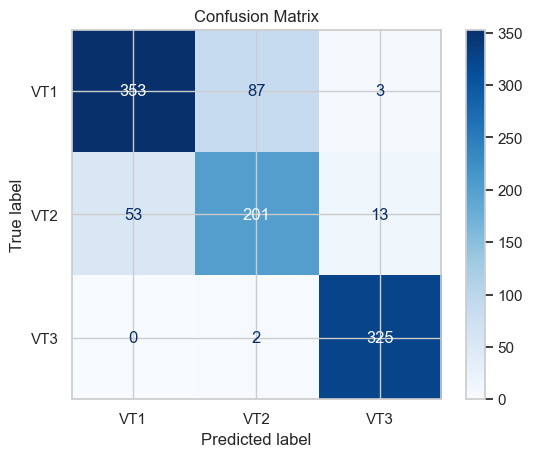

K-fold 5
Cross-Validation F1 Scores: [0.84790047 0.81173224 0.86040712 0.81485618 0.82537124]
Mean F1 Score: 0.832053
K-fold 10
Cross-Validation F1 Scores: [0.84145833 0.84351695 0.8005734  0.80467087 0.85320013 0.86958546
 0.81614405 0.81986329 0.82983227 0.82043761]
Mean F1 Score: 0.829928
Bootstrap Mean F1 Score: 0.826634

Evaluating LDA...
Holdout F1 Score: 0.828474
Confusion Matrix:
[[354  83   6]
 [ 58 182  27]
 [  0   2 325]]


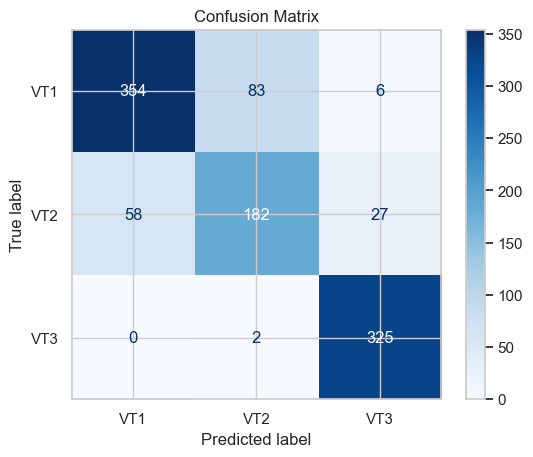

K-fold 5
Cross-Validation F1 Scores: [0.82847354 0.79690521 0.83577558 0.81686947 0.82506298]
Mean F1 Score: 0.820617
K-fold 10
Cross-Validation F1 Scores: [0.82360526 0.84271095 0.7829238  0.80999442 0.82972252 0.84271193
 0.81219432 0.82747799 0.83005386 0.81017932]
Mean F1 Score: 0.821157
Bootstrap Mean F1 Score: 0.808697

Evaluating QDA...
Holdout F1 Score: 0.659795
Confusion Matrix:
[[374  21  48]
 [162  41  64]
 [  0   0 327]]


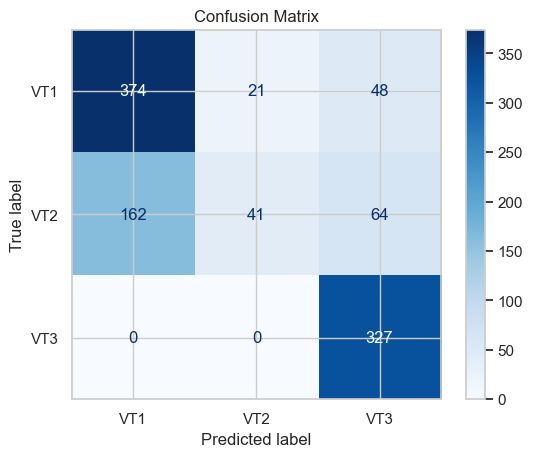

K-fold 5
Cross-Validation F1 Scores: [0.61670439 0.6466518  0.56396159 0.66674687 0.58047024]
Mean F1 Score: 0.614907
K-fold 10
Cross-Validation F1 Scores: [0.63488472 0.65053056 0.65391476 0.60125479 0.56801243 0.56946194
 0.67327391 0.62553428 0.56984627 0.55268532]
Mean F1 Score: 0.609940
Bootstrap Mean F1 Score: 0.621421


In [134]:
best_models = []

def evaluate_models(X, y):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight="balanced"),
        'LDA': LinearDiscriminantAnalysis(),
        'QDA': QuadraticDiscriminantAnalysis()
    }


    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}...")

        # Holdout
        X_train, X_test, y_train, y_test, y_pred, f1  = holdout(model, X, y)

        # Perform K-Fold Cross-Validation (5-fold)
        print("K-fold 5")
        mean_f1_cv5 = k_fold_cv(model, X, y, k=5)  # Perform 5-fold cross-validation

        # Perform K-Fold Cross-Validation (10-fold)
        print("K-fold 10")
        mean_f1_cv10 = k_fold_cv(model, X, y, k=10)  # Perform 10-fold cross-validation

        best_models.append({model_name + "_5-Fold" : mean_f1_cv5})
        best_models.append({model_name + "_10-Fold" : mean_f1_cv10})

        # LOOCV
        #loocv_accuracy = loocv(model, X_scaled, y)

        # Bootstrap Resampling
        bootstrap_accuracies = bootstrap(model, X, y, n_iterations=10)


# Now you can call the function to evaluate your models
evaluate_models(X_scaled, y)


Evaluating these F1-scores, some conclusions can be made about the resampling techniques and ML models. It can be noted that for all three models, holdout resampling gives the best results. For the models using the holdout resampling methods, the confusion matrix is given. The number of correctly (and wrongly) classifications is given in the confusion matrix. Moreover, the LR model outperforms the other two models with an F1-score of 0.846 but the LDA model also performs really good with an F1-score of 0.828. However, the QDA performs worst with an F1-score of 0.627. This can also be concluded from the confusion matrix. The bad performance of the QDA can be caused by multiple reasons. For example, maybe the relationships cannot be caught by the Quadratic nature of the QDA, or it is due to the imbalanced dataset and the classes are not well presented. 

# ANOVA Test
 
To possibly increase the perforamnce of the ML models, it is interesting to train the models with a modified dataset. The features that are irrelevant for identifying the target variable can be left out. To determine which features could potentially be dropped, an ANOVA test is used. This is a common method for this since ANOVA can help determine if there are statistically significant differences between the features. The features with a p-value < 0.05 are irrelevant and can be dropped. 

The following features will be dropped to possibly improve the model performance:
- *Rainfall_Winter*
- *Shadow_Index_15h*
- *Rainfall_Summer*
- *Canopy_Density*
- *Wind_Exposure_Level*

Moreover, these features also show a low correlation to the target variable in the bivariate analysis.

In [135]:
from scipy import stats

anova_results = {}

numerical_columns.remove('Vegetation_Type')  

for col in numerical_columns:
    groups = [df[col][df['Vegetation_Type'] == v] for v in df['Vegetation_Type'].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[col] = {'F-Value': f_val, 'P-Value': p_val}

anova_df = pd.DataFrame(anova_results).T
anova_df = anova_df.sort_values(by='P-Value', ascending=True)
print(anova_df)

                                        F-Value        P-Value
Altitude                            8108.496838   0.000000e+00
Horizontal_Distance_To_Roadways      768.599734  4.895404e-293
Horizontal_Distance_To_Fire_Points   589.154126  2.851838e-231
Slope                                518.856120  4.049174e-206
Vertical_Distance_To_Water            73.664611   2.846387e-32
Shadow_Index_12h                      71.019356   3.731671e-31
Shadow_Index_9h                       69.589377   1.501504e-30
Horizontal_Distance_To_Water          67.726721   9.216819e-30
Slope_Orientation                     14.755585   4.072983e-07
Rainfall_Winter                        2.570721   7.657796e-02
Shadow_Index_15h                       2.092790   1.234468e-01
Rainfall_Summer                        1.243260   2.885284e-01
Canopy_Density                         0.792777   4.526409e-01
Wind_Exposure_Level                    0.000003   9.999974e-01


### Methods Application with modified dataset
Now, the irrelevant features according to the ANOVA test and also correlation heathmap are dropped and all resampling methods are applied to the three ML models again.


Evaluating Logistic Regression...
Holdout F1 Score: 0.850000
Confusion Matrix:
[[352  88   3]
 [ 50 204  13]
 [  0   2 325]]


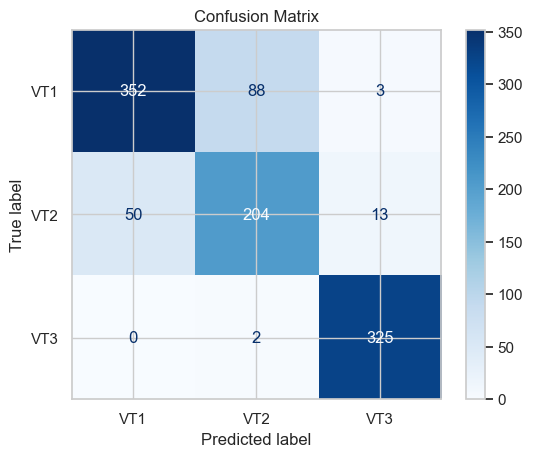

K-fold 5
Cross-Validation F1 Scores: [0.84999974 0.81314282 0.86116175 0.82010532 0.82251691]
Mean F1 Score: 0.833385
K-fold 10
Cross-Validation F1 Scores: [0.84533767 0.84351695 0.8005734  0.8143526  0.85490937 0.86514117
 0.82538814 0.8200181  0.82983227 0.81292186]
Mean F1 Score: 0.831199
Bootstrap Mean F1 Score: 0.828302

Evaluating LDA...
Holdout F1 Score: 0.831485
Confusion Matrix:
[[355  82   6]
 [ 56 184  27]
 [  0   2 325]]


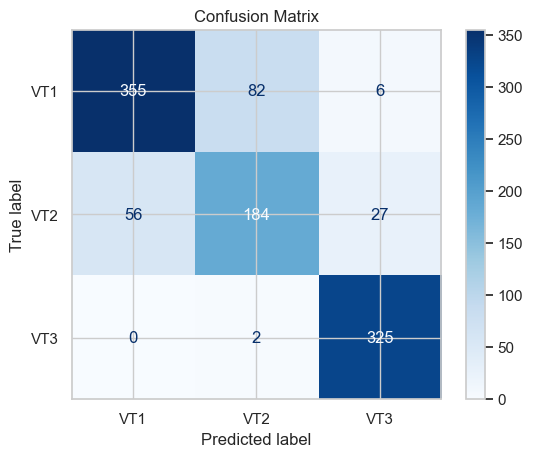

K-fold 5
Cross-Validation F1 Scores: [0.8314852  0.7954139  0.83452699 0.81839244 0.81745088]
Mean F1 Score: 0.819454
K-fold 10
Cross-Validation F1 Scores: [0.82321083 0.84634908 0.7821651  0.80950245 0.82753306 0.84900406
 0.82360593 0.82572322 0.83796381 0.80622859]
Mean F1 Score: 0.823129
Bootstrap Mean F1 Score: 0.792049

Evaluating QDA...
Holdout F1 Score: 0.604301
Confusion Matrix:
[[380   8  55]
 [189  10  68]
 [  0   0 327]]


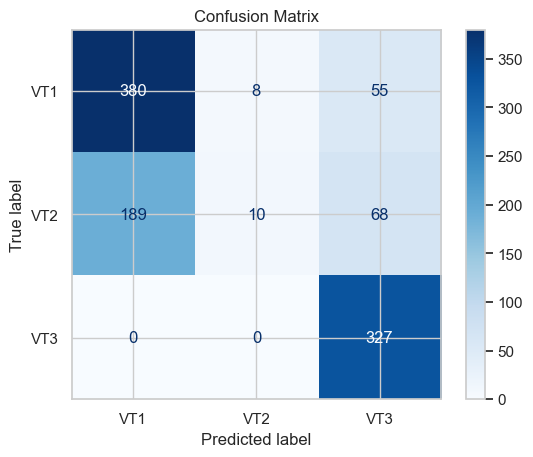

K-fold 5
Cross-Validation F1 Scores: [0.60361437 0.60464701 0.56396159 0.67358253 0.5962346 ]
Mean F1 Score: 0.608408
K-fold 10
Cross-Validation F1 Scores: [0.61927605 0.59494268 0.63462885 0.61328004 0.56379805 0.60622423
 0.67220012 0.62857272 0.58486367 0.57597705]
Mean F1 Score: 0.609376
Bootstrap Mean F1 Score: 0.631344


In [136]:
# Here we can select the best features based on the bivariate analysis and ANOVA test
X_best = df.drop(['Id', 'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level', 'Canopy_Density', 'Shadow_Index_15h', 'Vegetation_Type'], axis=1)
X_best_scaled = scaler.fit_transform(X_best)  # scale the input data

evaluate_models(X_best_scaled, y)

As can be noted, the LR model is still the best model among the three. Again, the LDA is very good again but the QDA still performs the worst. The holdout resampling method gives the best results for all three models, and due to the irrelevant feature deletion, the performance of every model increased. Again, for the holdout method the confusion matrix is shown for every model. Comparing the values in the confusion matrices to the confusion matrices of the model with the complete data, classification improvements can be recognized. For the holdout method, the F1-score for the LR, LDA and QDA increased, respectively (0.847 vs 0.846), (0.831 vs 0.828) and (0.646 vs 0.627).

#### ROC Curves 
The ROC curves below show the performance of the model with the complete dataset, and the model with the modified dataset. The ROC curve is a graph which can be used to evaluate the performance of a classification problem by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR), and useful for imbalanced datasets. A perfect model reaches the top left corner and a random classifier would follow the diagonal line (Area Under Curve (AUC) = 1).

For both models, the ROC curves look similar. If you look precisely, the ROC curve for the model with modified data heads a bit more towards the upper left corner. From the curves it can also be concluded that the Vegetation Type 2 (i.e., class 1) is the hardest to classify since the curve is the most towards the diagonal. Vegetation Type 3 (i.e., class 2) has the best performance. performance.

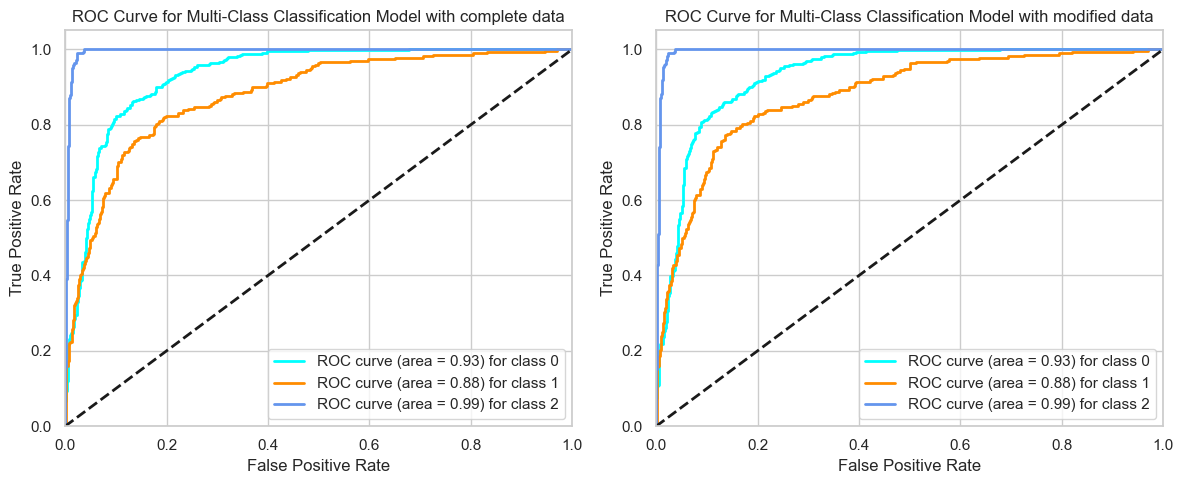

In [137]:
# Compare LR model with complete dataset and model with modified dataset
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_modified = LogisticRegression()
X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(X_best_scaled, y, test_size=0.2, random_state=42)

# Create a figure
plt.figure(figsize=(12, 5))

# Create the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.title('ROC Curve for Multi-Class Classification Model with complete data')
plot_roc_curve(model, X_train, X_test, y_train, y_test, n_classes=3)

# Create the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.title('ROC Curve for Multi-Class Classification Model with modified data')
plot_roc_curve(model_modified, X_train_modified, X_test_modified, y_train_modified, y_test_modified, n_classes=3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Conclusion**  
In conclusion, the best resampling method for this classification problem is holdout resampling. Moreover, the Logistic Regression model performs the best in terms of F1-score compared to the LDA and QDA model. Furthermore, manually removing irrelevant features can also improve model performance.

## Feature Selection

As just evaluated, removing irrelevant features from the model can improve the model performance. This can be done manually as in the previous step. However, there also methods that do this automatically. This is called *Regularization*. Regularization introduces extra penalty terms that influence the coefficients of features. The coefficient of a feature can then decrease until 0 (i.e., it is not used in the model), which also decreases model complexity. Moreover, this prevents the model for overfitting.  

- Overfitting: The model performs well on the training set but not so well on unseen (test) data.
- Underfitting: Neither performs well on the train set nor on the test set.

**Regularization** is thus implemented to avoid overfitting of the data, especially when there is a large variance between train and test set
performances. There are different methods of reducing the model complexity and preventing overfitting in linear models which are *Ridge*, *Lasso* and
*Elastic Net* Regression Models.

In the evaluation and understanding of *Ridge* and *Lasso* Regression, visualizations can be very helpful. The following cell of code will contain functions to efficiently make these visualizations. Here a short explanation on the visualization is given.


### Alpha-Weight plot

- X-axis: 
    - This is the regularization parameter for Ridge Regression.
    - Smaller alpha values mean less regularization 
    - Larger alpha values mean more regularization, which shrinks the coefficients towards zero.
- Y-axis
    - Each line corresponds to the coefficient value (weight) of a feature in the model.

#### Plot behaviour
- Small alpha values
    - Coefficients are large (the model tries to fit the training data closely).
- As alpha increases
    - Coefficients shrink towards zero, indicating regularization
    - If coefficient shrink to exactly 0 that mean feature is ignored in model
- Very high alpha
    - All coefficients tend towards zero, and the model behaves like a simple mean-based model 

#### Key insights
- Lower alpha indicate more complex model but potentially overfitting
- Higher alpha stabilize coefficients or shrink to zero, indicating simpler/more stable model but may underfit data
- If coefficients drop to zero early, that suggest that feature **may not contribute to much** in model

In [138]:
def plot_regression_model(alphas, coefs):

    """
    The plot_regression_model function is designed to show how the learned coefficients (weights) in a regression model 
    change as the regularization parameter (alpha) is varied. This plot is crucial to understanding how the model's sensitivity 
    to regularization impacts the feature weights.

    The x-axis uses a logarithmic scale to represent alpha, while the y-axis corresponds to the weights of the different 
    features in the regression model. This graph helps to see which features are most impacted by the regularization and 
    how some coefficients shrink toward zero as regularization increases, indicating less influence from those features.
    """

    plt.figure()
    ax = plt.gca() 
    ax.plot(alphas, coefs) 
    ax.set_xscale('log') 
    plt.axis('tight') 
    plt.xlabel('alpha') 
    plt.ylabel('weights')

### Bias-Variance Trade-off

The graph illustrates the bias-variance trade-off in regularized regression models. As the regularization parameter increases:

Bias increases: The model becomes simpler, potentially underfitting the data and leading to higher systematic errors.
Variance decreases: The model becomes more robust to noise in the training data, reducing overfitting.
The optimal value of the regularization parameter balances this trade-off, minimizing the overall prediction error. The minimum MSE point on the graph highlights this optimal value.

#### Key Takeaways

Regularization Strength: A higher regularization parameter imposes stronger constraints on the model, reducing its complexity.
Bias-Variance Trade-off: There is an inherent trade-off between bias and variance. Choosing the right regularization parameter is crucial to find the sweet spot.
Model Generalization: The goal is to find a model that generalizes well to unseen data, minimizing both bias and variance.

Difference between Ridge and Lasso with Elastic Net is that Test MSE increase faster but also faster remain stable.

In [139]:
def plot_bias_variance_tradeoff(alphas, squared_bias, variance, mse):

    """
    The plot_bias_variance_tradeoff function provides a visualization of the classic bias-variance tradeoff. 
    It demonstrates how changes in the regularization parameter (denoted as alphas) affect squared bias,
    variance, and the mean squared error (MSE).
    """

    plt.figure(figsize=(10, 6))
    plt.plot(alphas, squared_bias, color='black', label='Squared Bias', linewidth=2)
    plt.plot(alphas, variance, color='green', label='Variance', linewidth=2)
    plt.plot(alphas, mse, color='purple', label='Test MSE', linewidth=2)
    plt.xscale('log')
    plt.axhline(y=min(mse), color='red', linestyle='--', label='Minimum MSE')
    plt.scatter(alphas[np.argmin(mse)], min(mse), color='purple', marker='x', s=100, label='Minimum MSE Point')
    plt.title('Regularization Regression: Bias, Variance, and MSE vs. Regularization Parameter (λ)')
    plt.xlabel('Regularization Parameter (λ)')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()
    plt.show()


### Ridge Regression
Is a variation of linear regression, specifically designed to address multicollinearity in the dataset. In linear regression, the goal is to find the best-fitting hyperplane that minimizes the sum of squared differences between the
observed and predicted values, but when there is high correlation between variables, LR model may be moderately or highly correlated with another.
Multicollinearity exists when 2 or more predictors in regression model are correlated with another one. 

*Ridge Regression* use *L2 penalty*, that penalize the large coefficients to prevent overfitting.

The tuning parameter λ serves to control the relative impact, when λ = 0 than penalty has no effect. As λ grows to infitite the penalty grows which lead to shrinking coeffiecients to zero. Cross-Validation is used for selecting a good value for λ as it's very important.

### Lasso Regression
Lasso (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses *L1* regularization to prevent overfitting by penalizing the absolute size of regression coefficients.
- It adds a penalty equivalent to the sum of the absolute values of coefficients to the loss function
- Lasso shrinks some coefficients to exactly zero, effectively selecting a subset of features. This makes it a good choice when dealing with high-dimensional data or when some features are irrelevant
- By shrinking coefficients, Lasso reduces variance at the cost of introducing some bias, helping to improve generalization

### Elastic Net Regression 
Elastic Net combines the *L1* and *L2* penalty of Ridge and Lasso regression. 
- An extra hyperparameter is introduced which balances the combination of the *L1* and *L2* penalties
- This is a very efficient method in high dimension datasets

In [140]:
from typing import Union
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

def process_regression_model(regression_model: Union[Ridge, Lasso, ElasticNet], alphas, X, y, X_train = 0, y_train = 0, x_test = 0, y_test = 0):
    """
    Fit a regression model (Ridge, Lasso or ElasticNet) over a range of regularization parameters (alphas)
    and compute the corresponding coefficients, mean squared error, squared bias, and variance.
    """

    model = regression_model
    coefs = []

    mse = []
    squared_bias = []
    variance = []

    for a in alphas:
        model.set_params(alpha = a)
        model.fit(X_train, y_train)
        coefs.append(model.coef_)
        y_pred = model.predict(x_test)

        mse.append(mean_squared_error(y_pred, y_test))

        bias = np.mean(y_pred - y_test)
        squared_bias.append(bias ** 2)
        variance.append(np.var(y_pred))
                
    np.shape(coefs)
    plot_regression_model(alphas, coefs)      
    plot_bias_variance_tradeoff(alphas, squared_bias, variance, mse)     

def process_regression_model_w_cross_validation(regression_model_input: Union[Ridge, Lasso, ElasticNet], alphas, X_train, y_train, X_test, y_test):

    """
    Perform cross-validation to select the best regularization parameter (alpha) for a regression model
    (Ridge, Lasso or ElasticNet), fit the model using the best alpha, and evaluate its performance on the test set 
    by calculating the mean squared error and R² score. Additionally, it sorts and displays the coefficients 
    based on their absolute values.
    """

    if regression_model_input == Ridge:
        cv_model = RidgeCV
    elif regression_model_input == Lasso:
        cv_model = LassoCV
    else:
        cv_model = ElasticNetCV

    regression_model_CV = cv_model(alphas = alphas)
    if cv_model == RidgeCV:
        regression_model_CV.set_params(scoring = 'neg_mean_squared_error') 
    elif cv_model == LassoCV:
        regression_model_CV.set_params(cv=5, random_state=42)
    else:
        regression_model_CV.set_params(l1_ratio=0.7)

    regression_model_CV.fit(X_train, y_train)

    best_alpha = regression_model_CV.alpha_
    print(f"Best alpha after Cross Validation : {best_alpha}")

    regression_model = regression_model_input
    regression_model.set_params(alpha = best_alpha) 
    regression_model.fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.5f}")
    r2 = r2_score(y_test, y_pred)
    print(f"R² Score: {r2}")
    
    coef_series = pd.Series(regression_model.coef_, index=X.columns)
    sorted_coef = coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)

    print("Coefficients sorted by absolute value:")
    print(sorted_coef)

In [141]:
X = X.apply(lambda col: col.astype('float64') if col.dtype in ['int64', 'float32', 'float64'] else col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc=StandardScaler() 
X_train=sc.fit_transform(X_train) 
X_test=sc.transform(X_test)

In [142]:
# Create a range of alphas to use in the regularization methods
alphas = 10**np.linspace(10,-2,100)*0.5 


Evaluating regression model type Ridge...


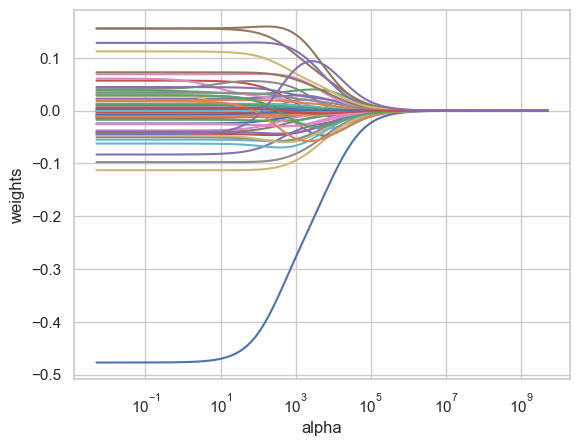

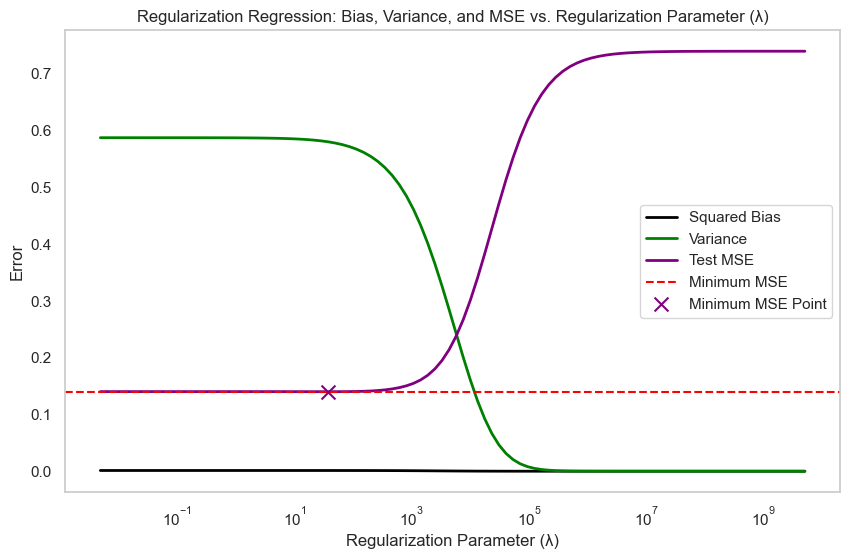


Evaluating regression model type Lasso...


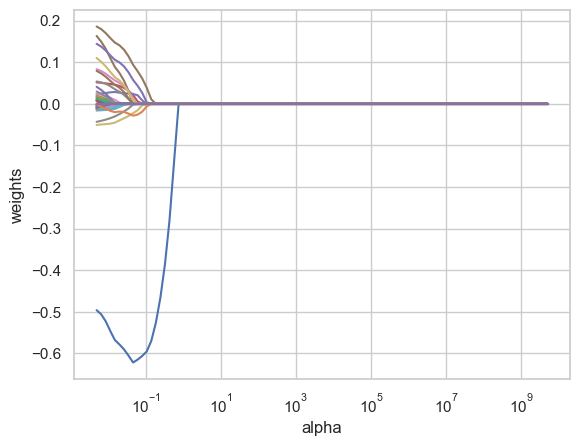

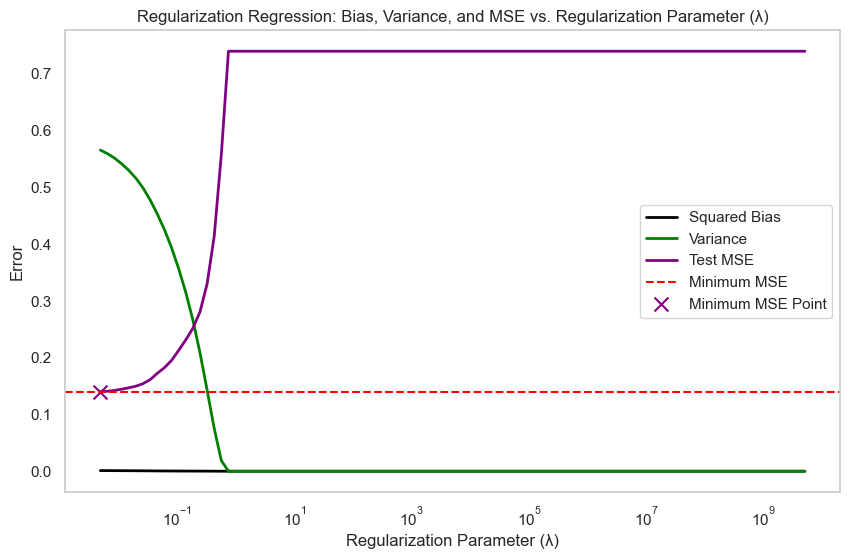


Evaluating regression model type ElasticNet...


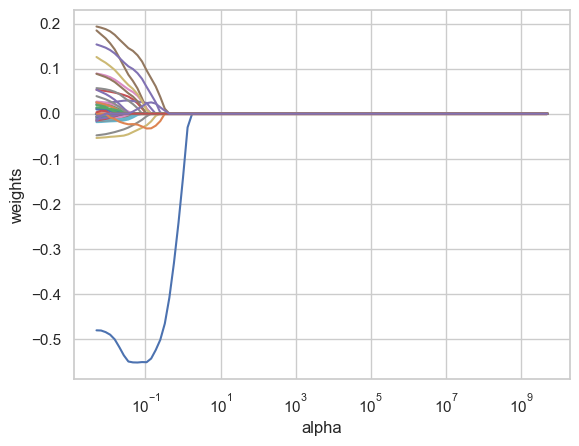

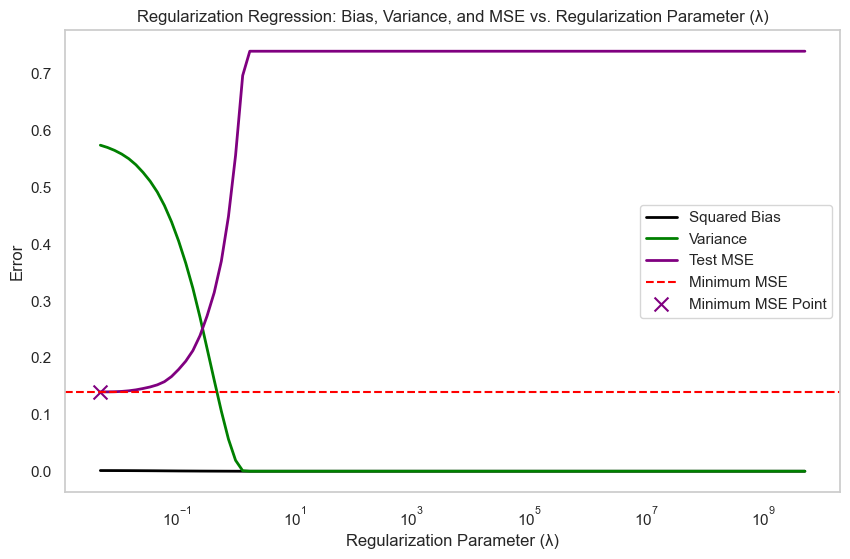

In [143]:
def evaluate_regression_models(X, y, X_train, X_test, y_train, y_test):
    regression_models = {
        "Ridge" : Ridge(),
        "Lasso" : Lasso(),
        "ElasticNet" : ElasticNet()
    }

    for model_name, model in regression_models.items():
        print(f"\nEvaluating regression model type {model_name}...")

        process_regression_model(model, alphas, X, y, X_train, y_train, X_test, y_test)
        #process_regression_model_w_cross_validation(model, alphas, X_train, y_train, X_test, y_test)

evaluate_regression_models(X_scaled ,y, X_train, X_test, y_train, y_test)

### Conclusion Regularization 
As can be seen, for the Ridge Regression, the coefficients of some variables decrease but never reach 0. For Lasso and ElasticNet variables' coefficients actually shrink to 0, indicating that they are not used in the classification problem. Especially the coefficients of the Soil Types that are not frequent in the dataset shrink to 0. The figures indicate the best value for the regularization methods which is 0.005 in all cases. 

Moreover, the performance of the regularization methods can be compared using the evaluation metrics. Since these regularization metrics are regression models, different evaluation metrics can be used. The evaluation metrics that are used are the R2 score and the Mean Squared Error (MSE). All regularization methods have a very similar performance. The R2 score for the Ridge, Lasso and Elastic Net Regression are respectively 0.815, 0.813 and 0.814 and the MSE is respectively 0.135, 0.137 and 0.136. The Ridge Regression model thus performs best for this problem. 



In [144]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression
# Initialize and train Ridge Classifier with L2 regularization
best_alpha = 0.005
ridge_clf = RidgeClassifier(alpha=best_alpha)  # alpha is the regularization strength
ridge_clf.fit(X_train, y_train)

# Logistic Regression with Lasso regularization (L1 penalty)
lasso_clf = LogisticRegression(penalty='l1', solver='saga', C=1/best_alpha, random_state=42, max_iter=10000)
lasso_clf.fit(X_train, y_train)

# Logistic Regression with Elastic Net regularization (L1 + L2 penalty)
elastic_net_clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1/best_alpha, random_state=42, max_iter=10000)
elastic_net_clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_ridge = ridge_clf.predict(X_test)
y_pred_lasso = lasso_clf.predict(X_test)
y_pred_elastic = elastic_net_clf.predict(X_test)

f1_ridge = f1_score(y_test, y_pred_ridge, average='weighted')
print(f'F1-score Ridge Classifier: {f1_ridge}')
f1_lasso = f1_score(y_test, y_pred_lasso, average='weighted')
print(f'F1-score Lasso Classifier: {f1_lasso}')
f1_elastic = f1_score(y_test, y_pred_elastic, average='weighted')
print(f'F1-score Elastic Net Classifier: {f1_elastic}')

F1-score Ridge Classifier: 0.8178413266423399
F1-score Lasso Classifier: 0.8280430057456482
F1-score Elastic Net Classifier: 0.8280430057456482


# Can Classification Models Perform Better with Fewer Features? 

In classification problems, using all available features does not always lead to the best model performance. Sometimes, certain features may be irrelevant, redundant, or noisy, potentially degrading the model's accuracy and interpretability. Feature selection—choosing a subset of the most relevant features—can improve classification performance by reducing overfitting, speeding up the training process, and simplifying the model. Therefore, it is crucial to explore whether a model can achieve better results by focusing on a few significant features instead of all available ones.

In [145]:
best_models.append({"Ridge": f1_ridge})
best_models.append({"Lasso": f1_lasso})
best_models.append({"ElasticNet": f1_elastic})

for index, model in enumerate(best_models):
    if index == 0:
        print("Results of models with all features:")
    elif index == 6:
        print("\nResults of models with selected features:")
    elif index == 12:
        print("\nResults of Regressions models:")
    
    for model_name, f1_score in model.items():
        print(f"{model_name}: F1 Score = {f1_score}")

Results of models with all features:
Logistic Regression_5-Fold: F1 Score = 0.8320534496962797
Logistic Regression_10-Fold: F1 Score = 0.8299282373874878
LDA_5-Fold: F1 Score = 0.8206173560776646
LDA_10-Fold: F1 Score = 0.8211574375828364
QDA_5-Fold: F1 Score = 0.6149069767015577
QDA_10-Fold: F1 Score = 0.6099398962504629

Results of models with selected features:
Logistic Regression_5-Fold: F1 Score = 0.8333853070178987
Logistic Regression_10-Fold: F1 Score = 0.8311991543501879
LDA_5-Fold: F1 Score = 0.8194538816481878
LDA_10-Fold: F1 Score = 0.823128613144363
QDA_5-Fold: F1 Score = 0.6084080187597467
QDA_10-Fold: F1 Score = 0.6093763439062847

Results of Regressions models:
Ridge: F1 Score = 0.8178413266423399
Lasso: F1 Score = 0.8280430057456482
ElasticNet: F1 Score = 0.8280430057456482


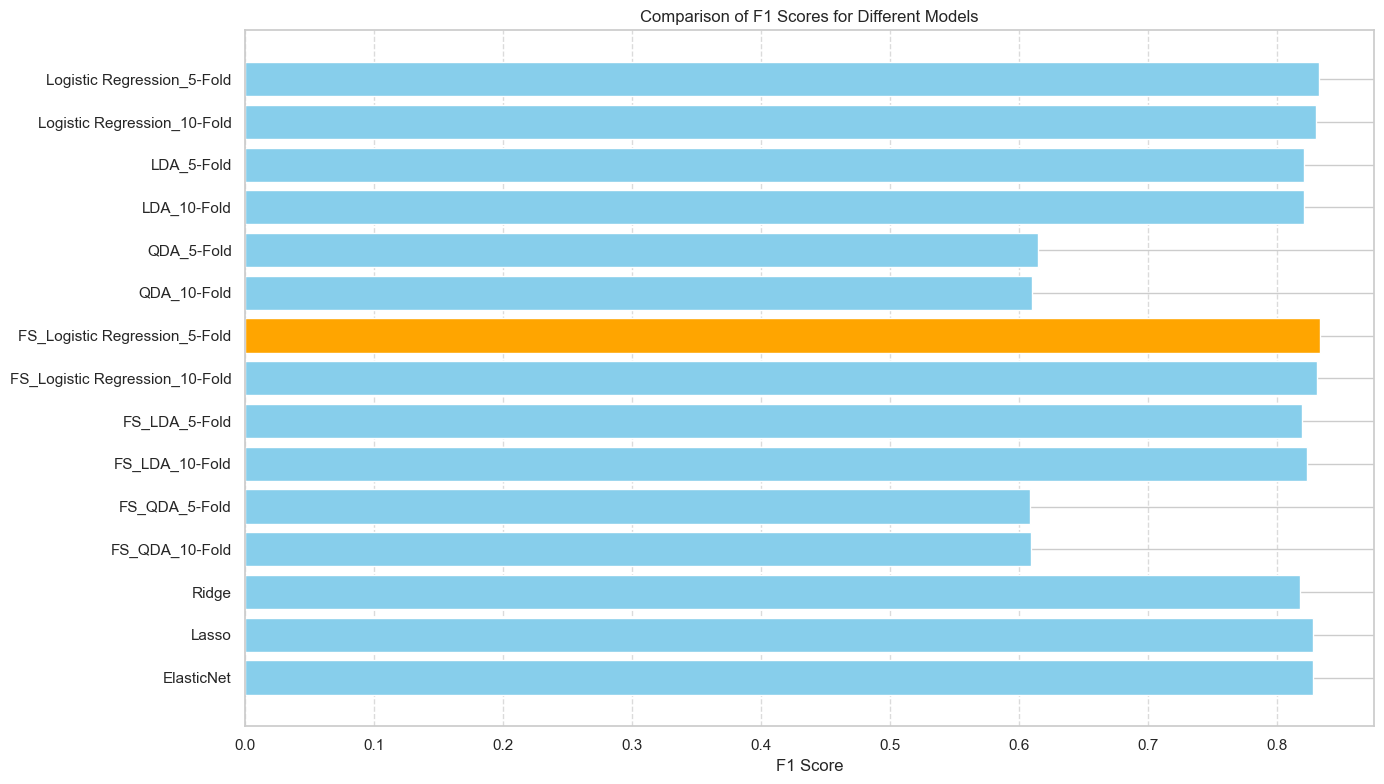

In [146]:
model_names = []
f1_scores = []

for index, model in enumerate(best_models):
    for name, score in model.items():
        if 6 <= index < 12:
            prefix = "FS_"
        else:
            prefix = ""
        model_names.append(prefix + name)
        f1_scores.append(score)

max_index = np.argmax(f1_scores)

colors = ['skyblue' if i != max_index else 'orange' for i in range(len(f1_scores))]

plt.figure(figsize=(14, 8))
plt.barh(model_names, f1_scores, color=colors)
plt.xlabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()